In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p /content/nuscenes
!cp /content/drive/MyDrive/v1.0-mini.tgz /content/nuscenes/
%cd /content/nuscenes
!tar -xvzf v1.0-mini.tgz

Streaming output truncated to the last 5000 lines.
sweeps/RADAR_FRONT_RIGHT/n015-2018-10-02-10-50-40+0800__RADAR_FRONT_RIGHT__1538448763367118.pcd
sweeps/RADAR_FRONT_RIGHT/n008-2018-08-27-11-48-51-0400__RADAR_FRONT_RIGHT__1535385095712026.pcd
sweeps/RADAR_FRONT_RIGHT/n015-2018-11-21-19-38-26+0800__RADAR_FRONT_RIGHT__1542800373890829.pcd
sweeps/RADAR_FRONT_RIGHT/n015-2018-10-02-10-50-40+0800__RADAR_FRONT_RIGHT__1538448759670003.pcd
sweeps/RADAR_FRONT_RIGHT/n008-2018-08-30-15-16-55-0400__RADAR_FRONT_RIGHT__1535657108526513.pcd
sweeps/RADAR_FRONT_RIGHT/n015-2018-11-21-19-38-26+0800__RADAR_FRONT_RIGHT__1542800863656852.pcd
sweeps/RADAR_FRONT_RIGHT/n015-2018-11-21-19-38-26+0800__RADAR_FRONT_RIGHT__1542800991116832.pcd
sweeps/RADAR_FRONT_RIGHT/n015-2018-10-02-10-50-40+0800__RADAR_FRONT_RIGHT__1538448759815959.pcd
sweeps/RADAR_FRONT_RIGHT/n015-2018-11-21-19-38-26+0800__RADAR_FRONT_RIGHT__1542800379938412.pcd
sweeps/RADAR_FRONT_RIGHT/n008-2018-08-27-11-48-51-0400__RADAR_FRONT_RIGHT__1535385099

In [ ]:
!pip install nuscenes-devkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 98.0 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.5.3-cp311-cp311-linux_x86_64.whl size=11116979 sha256=cc25414f4a69c22ac76929728233d83ca83ca25aaf48c4d9aa74a8ac47fc1515
  Stored in directory: /root/.cache/pip/wheels/5d/3b/87/b850f835f7a97bd28b0fb81fd73bdb17755122ea5ad71484f9
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=f9486337e3dac523f826174be026d05875b242396a8522dd8525051a427f6f08
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6

In [ ]:
from nuscenes.nuscenes import NuScenes

# Initialize the dataset
nusc = NuScenes(version='v1.0-mini', dataroot='/content/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.426 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


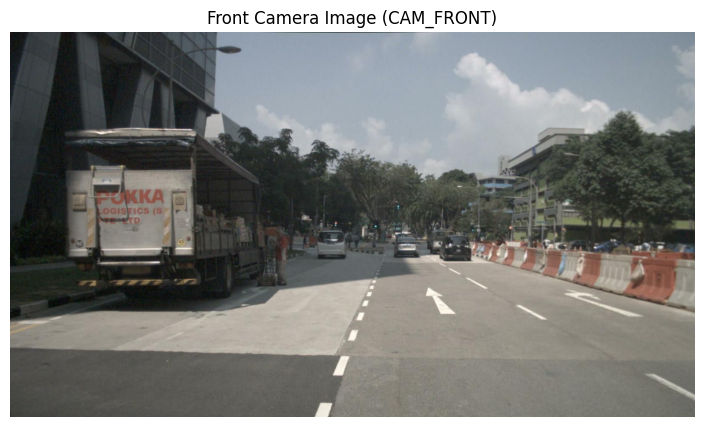

In [ ]:
from nuscenes.utils.data_classes import Box
from nuscenes.utils.geometry_utils import view_points
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

# Monkey patch for backward compatibility with libraries using np.Inf
if not hasattr(np, 'Inf'):
    np.Inf = np.inf

# Get a sample
sample = nusc.sample[0]

# Get front camera image path
cam_token = sample['data']['CAM_FRONT']
cam_data = nusc.get('sample_data', cam_token)
img_path = nusc.get_sample_data_path(cam_token)

# Load image using PIL
img = Image.open(img_path)

# Convert PIL image to NumPy array

img_np = np.array(img)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.title('Front Camera Image (CAM_FRONT)')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from nuscenes.utils.geometry_utils import transform_matrix, view_points
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud, Box

NameError: name 'pts_lidar' is not defined

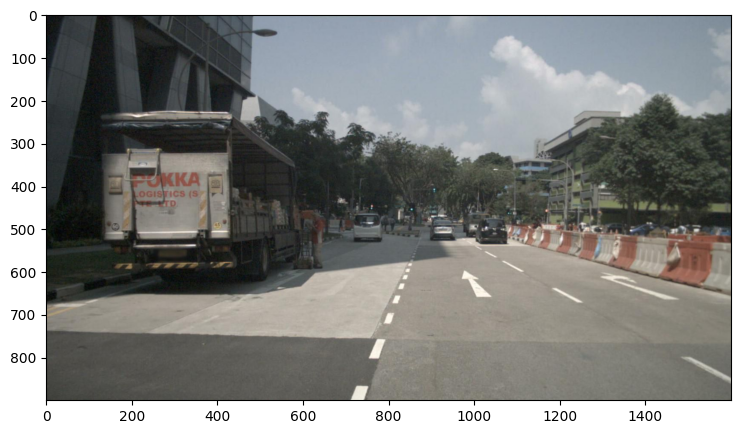

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(img_np)
plt.scatter(pts_lidar[0], pts_lidar[1], s=1, c='green', label='LiDAR')
plt.title('LiDAR Points on CAM_FRONT')
plt.axis('off')
plt.legend()
plt.show()

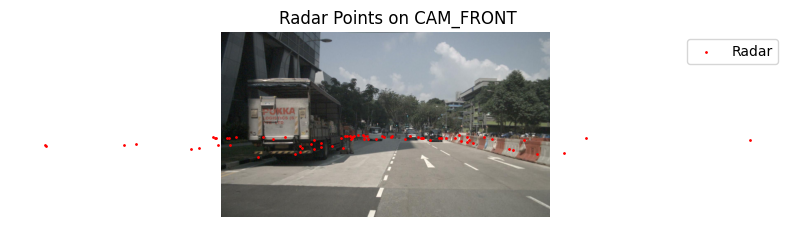

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(img_np)
plt.scatter(pts_radar[0], pts_radar[1], s=1, c='red', label='Radar')
plt.title('Radar Points on CAM_FRONT')
plt.axis('off')
plt.legend()
plt.show()

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.653 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


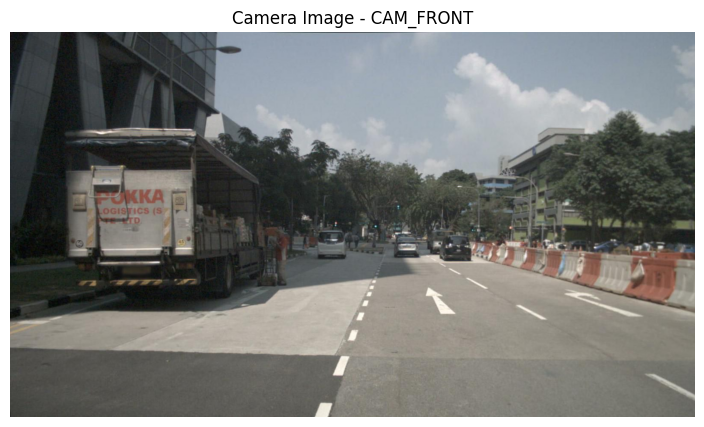

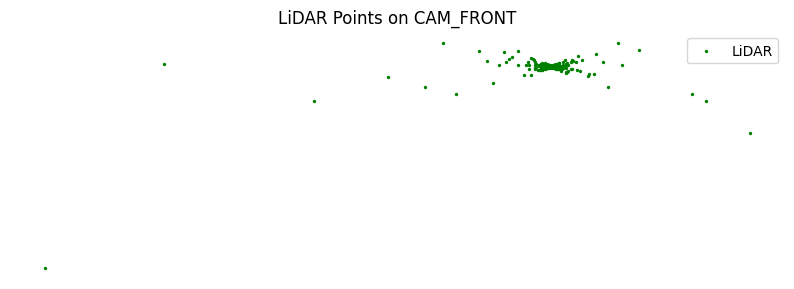

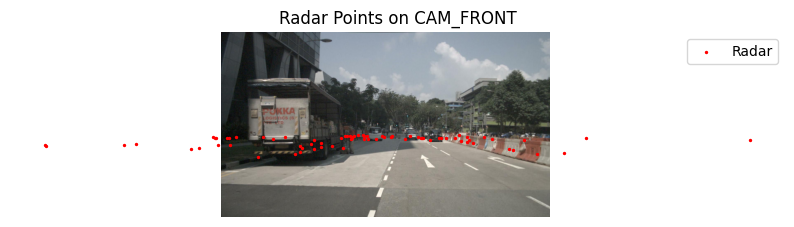

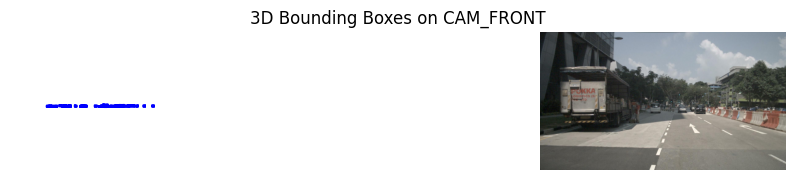

In [ ]:
###########################
# 1) Imports and Setup
###########################
!pip install nuscenes-devkit pyquaternion > /dev/null

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pyquaternion import Quaternion

# NuScenes-specific imports
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box, LidarPointCloud, RadarPointCloud
from nuscenes.utils.geometry_utils import view_points

# Monkey patch for np.Inf issues in NumPy 2.0
if not hasattr(np, 'Inf'):
    np.Inf = np.inf

###########################
# 2) Initialize nuScenes
###########################
# Update the path if needed:
DATA_ROOT = '/content/nuscenes'  # Where you extracted v1.0-mini

nusc = NuScenes(version='v1.0-mini', dataroot=DATA_ROOT, verbose=True)

# We'll pick the first sample for demonstration
sample = nusc.sample[0]

###########################
# 3) Grab Sensor Data Paths
###########################
cam_token = sample['data']['CAM_FRONT']
lidar_token = sample['data']['LIDAR_TOP']
radar_token = sample['data']['RADAR_FRONT']

cam_data = nusc.get('sample_data', cam_token)
lidar_data = nusc.get('sample_data', lidar_token)
radar_data = nusc.get('sample_data', radar_token)

cam_path = nusc.get_sample_data_path(cam_token)
lidar_path = nusc.get_sample_data_path(lidar_token)
radar_path = nusc.get_sample_data_path(radar_token)

# Camera calibration
cam_calib = nusc.get('calibrated_sensor', cam_data['calibrated_sensor_token'])
cam_intrinsic = np.array(cam_calib['camera_intrinsic'])

###########################
# 4) Load Point Clouds
###########################
pc_lidar = LidarPointCloud.from_file(lidar_path)
pc_radar = RadarPointCloud.from_file(radar_path)

###########################
# 5) Define a Transform Function
###########################
def transform_pointcloud(pc, source_sd, target_sd):
    """
    Transform point cloud from the source sensor frame to the target sensor frame.
    source_sd: source sample_data dict
    target_sd: target sample_data dict
    """
    # 1) Get calibrated sensor + ego pose for source
    source_cs = nusc.get('calibrated_sensor', source_sd['calibrated_sensor_token'])
    source_ep = nusc.get('ego_pose', source_sd['ego_pose_token'])

    # 2) Get calibrated sensor + ego pose for target (camera)
    target_cs = nusc.get('calibrated_sensor', target_sd['calibrated_sensor_token'])
    target_ep = nusc.get('ego_pose', target_sd['ego_pose_token'])

    # 3) Build transformation matrices
    #    source -> ego -> global
    cs_source_to_ego = transform_matrix(source_cs['translation'], Quaternion(source_cs['rotation']))
    ego_to_global = transform_matrix(source_ep['translation'], Quaternion(source_ep['rotation']))

    #    global -> ego (target) -> target sensor
    global_to_ego_target = np.linalg.inv(transform_matrix(target_ep['translation'], Quaternion(target_ep['rotation'])))
    ego_to_cs_target = np.linalg.inv(transform_matrix(target_cs['translation'], Quaternion(target_cs['rotation'])))

    # Full transform: source -> ego -> global -> ego_target -> target_sensor
    full_T = ego_to_cs_target @ global_to_ego_target @ ego_to_global @ cs_source_to_ego
    pc.transform(full_T)
    return pc

def transform_matrix(translation, rotation=Quaternion()):
    """
    Converts pose to a transformation matrix.
    """
    tm = np.eye(4)
    tm[:3, :3] = rotation.rotation_matrix
    tm[:3, 3] = translation
    return tm

###########################
# 6) Transform Lidar + Radar to Camera Frame
###########################
pc_lidar = transform_pointcloud(pc_lidar, lidar_data, cam_data)
pc_radar = transform_pointcloud(pc_radar, radar_data, cam_data)

###########################
# 7) Project Points to 2D
###########################
pts_lidar = view_points(pc_lidar.points[:3, :], cam_intrinsic, normalize=True)
pts_radar = view_points(pc_radar.points[:3, :], cam_intrinsic, normalize=True)

###########################
# 8) Load Camera Image
###########################
img = Image.open(cam_path)
img_np = np.array(img)

###########################
# 9) Visualize (Four Plots)
###########################

# 9A) Camera Image Only
plt.figure(figsize=(10, 5))
plt.imshow(img_np)
plt.title('Camera Image - CAM_FRONT')
plt.axis('off')
plt.show()

# 9B) LiDAR Points over Camera Image
plt.figure(figsize=(10, 5))
plt.imshow(img_np)
plt.scatter(pts_lidar[0], pts_lidar[1], s=2, c='green', label='LiDAR')
plt.title('LiDAR Points on CAM_FRONT')
plt.axis('off')
plt.legend()
plt.show()

# 9C) Radar Points over Camera Image
plt.figure(figsize=(10, 5))
plt.imshow(img_np)
plt.scatter(pts_radar[0], pts_radar[1], s=2, c='red', label='Radar')
plt.title('Radar Points on CAM_FRONT')
plt.axis('off')
plt.legend()
plt.show()

# 9D) 3D Bounding Boxes (no point cloud)
plt.figure(figsize=(10, 5))
plt.imshow(img_np)

for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    # Create the 3D box
    box = Box(
        center=ann['translation'],
        size=ann['size'],
        orientation=Quaternion(ann['rotation'])
    )
    # Move box to camera frame
    box.translate(-np.array(cam_calib['translation']))
    box.rotate(Quaternion(cam_calib['rotation']).inverse)

    # Project corners onto image
    corners_3d = box.corners()
    corners_2d = view_points(corners_3d, cam_intrinsic, normalize=True)

    # Draw the 3D bounding box lines
    for i in range(4):
        x = [corners_2d[0, i], corners_2d[0, i + 4]]
        y = [corners_2d[1, i], corners_2d[1, i + 4]]
        plt.plot(x, y, 'b-')

    # Draw front face
    front = [0, 1, 2, 3, 0]
    plt.plot(corners_2d[0, front], corners_2d[1, front], 'b-')

    # Draw back face
    back = [4, 5, 6, 7, 4]
    plt.plot(corners_2d[0, back], corners_2d[1, back], 'b-')

plt.title('3D Bounding Boxes on CAM_FRONT')
plt.axis('off')
plt.show()

In [ ]:
from nuscenes.utils.geometry_utils import BoxVisibility

cam_token = sample['data']['CAM_FRONT']

data_path, boxes, camera_intrinsic = nusc.get_sample_data(
    cam_token,
    box_vis_level=BoxVisibility.ANY
)

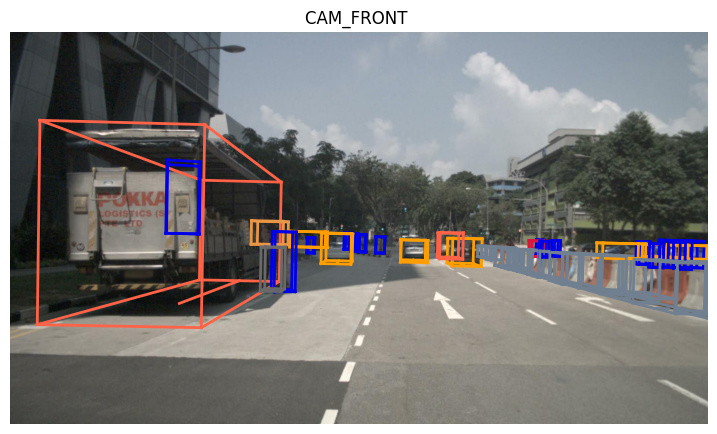

In [ ]:
nusc.render_sample_data(
    sample_data_token=cam_token,
    with_anns=True,
    box_vis_level=BoxVisibility.ANY
)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.598 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


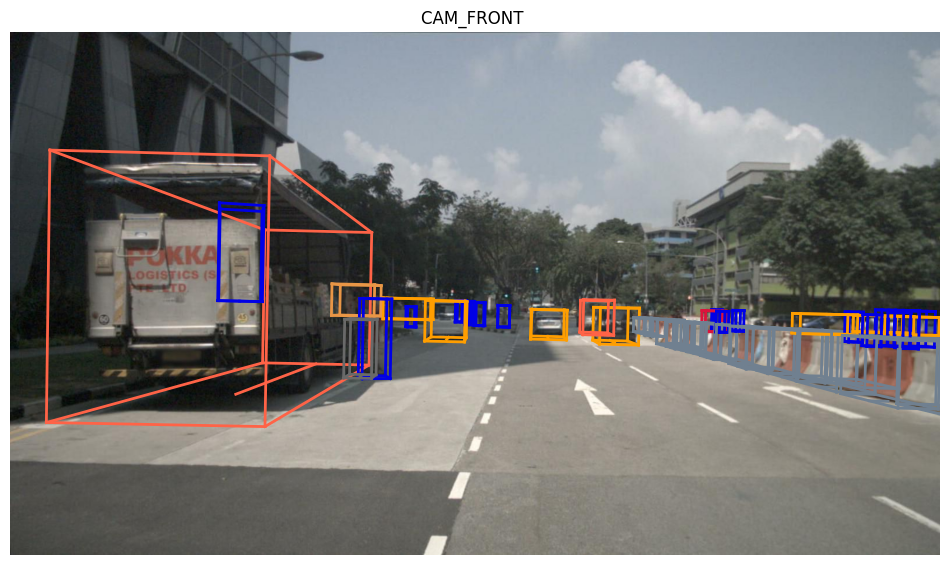

KeyError: 'e3d495d4ac534d54b321f50006683844'

In [ ]:
import matplotlib.pyplot as plt
from nuscenes.nuscenes import NuScenes, NuScenesExplorer
from nuscenes.utils.geometry_utils import BoxVisibility

# Initialize NuScenes and its Explorer
nusc = NuScenes(version='v1.0-mini', dataroot='/content/nuscenes', verbose=True)
nusc_explorer = NuScenesExplorer(nusc)

# Pick a sample and select the CAM_FRONT token
sample = nusc.sample[0]
cam_token = sample['data']['CAM_FRONT']

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Render the camera image with 3D bounding boxes (annotations)
nusc_explorer.render_sample_data(
    cam_token,
    with_anns=True,
    box_vis_level=BoxVisibility.ANY,
    ax=ax
)

# Overlay LiDAR points on the same image
nusc_explorer.render_pointcloud_in_image(
    cam_token,
    pointsensor_channel='LIDAR_TOP',
    ax=ax
)

# Overlay Radar points on the same image
nusc_explorer.render_pointcloud_in_image(
    cam_token,
    pointsensor_channel='RADAR_FRONT',
    ax=ax
)

plt.show()

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.613 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


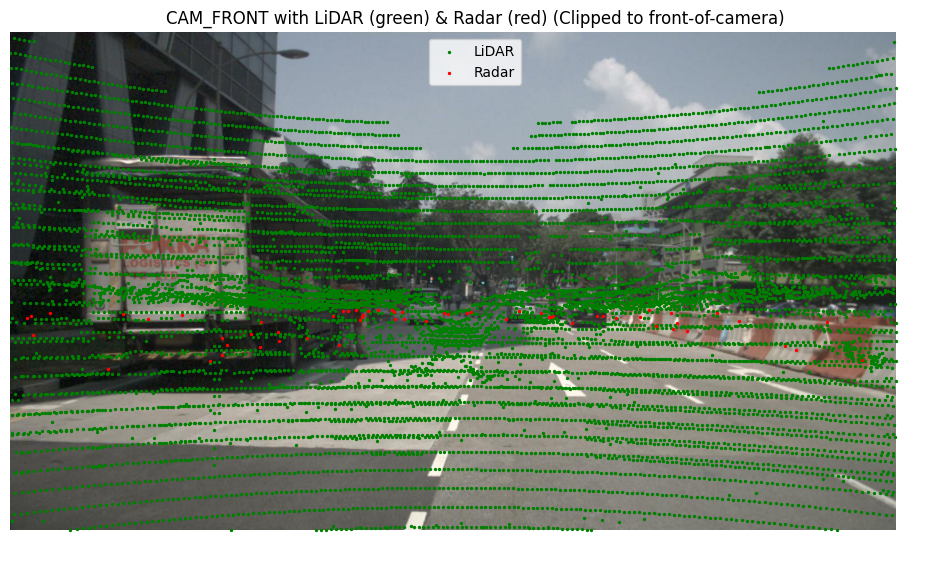

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud
from nuscenes.utils.geometry_utils import view_points
from pyquaternion import Quaternion

def get_transform(translation, rotation):
    """Convert translation + quaternion rotation to a 4x4 transform matrix."""
    T = np.eye(4)
    T[:3, :3] = Quaternion(rotation).rotation_matrix
    T[:3, 3] = translation
    return T

def transform_pointcloud(pc, source_sd, target_sd):
    """Transform a point cloud from the source sensor frame to the target sensor frame."""
    source_cs = nusc.get('calibrated_sensor', source_sd['calibrated_sensor_token'])
    source_ep = nusc.get('ego_pose', source_sd['ego_pose_token'])
    target_cs = nusc.get('calibrated_sensor', target_sd['calibrated_sensor_token'])
    target_ep = nusc.get('ego_pose', target_sd['ego_pose_token'])

    # source -> ego -> global
    T_source_to_ego = get_transform(source_cs['translation'], source_cs['rotation'])
    T_ego_to_global = get_transform(source_ep['translation'], source_ep['rotation'])
    # global -> ego(target) -> sensor(target)
    T_global_to_target_ego = np.linalg.inv(get_transform(target_ep['translation'], target_ep['rotation']))
    T_target_ego_to_sensor = np.linalg.inv(get_transform(target_cs['translation'], target_cs['rotation']))

    # Full transform
    full_T = T_target_ego_to_sensor @ T_global_to_target_ego @ T_ego_to_global @ T_source_to_ego
    pc.transform(full_T)
    return pc

#########################################
# 1) Initialize nuScenes + Load Data
#########################################
DATA_ROOT = '/content/nuscenes'
nusc = NuScenes(version='v1.0-mini', dataroot=DATA_ROOT, verbose=True)

# Pick a sample
sample = nusc.sample[0]

# Camera
cam_token = sample['data']['CAM_FRONT']
cam_data = nusc.get('sample_data', cam_token)
cam_path = nusc.get_sample_data_path(cam_token)
cam_calib = nusc.get('calibrated_sensor', cam_data['calibrated_sensor_token'])
cam_intrinsic = np.array(cam_calib['camera_intrinsic'])

# LiDAR
lidar_token = sample['data']['LIDAR_TOP']
lidar_data = nusc.get('sample_data', lidar_token)
lidar_path = nusc.get_sample_data_path(lidar_token)
pc_lidar = LidarPointCloud.from_file(lidar_path)

# Radar
radar_token = sample['data']['RADAR_FRONT']
radar_data = nusc.get('sample_data', radar_token)
radar_path = nusc.get_sample_data_path(radar_token)
pc_radar = RadarPointCloud.from_file(radar_path)

#########################################
# 2) Transform LiDAR + Radar to Camera Frame
#########################################
pc_lidar = transform_pointcloud(pc_lidar, lidar_data, cam_data)
pc_radar = transform_pointcloud(pc_radar, radar_data, cam_data)

#########################################
# 3) Project Points
#########################################
pts_lidar = view_points(pc_lidar.points[:3, :], cam_intrinsic, normalize=True)
pts_radar = view_points(pc_radar.points[:3, :], cam_intrinsic, normalize=True)

#########################################
# 4) Clip Points Outside the Image or Behind Camera
#########################################
img = np.array(Image.open(cam_path))
h, w = img.shape[:2]

# LiDAR
valid_lidar = (
    (pts_lidar[0] >= 0) & (pts_lidar[0] < w) &
    (pts_lidar[1] >= 0) & (pts_lidar[1] < h) &
    (pts_lidar[2] > 0)
)
pts_lidar_valid = pts_lidar[:, valid_lidar]

# Radar
valid_radar = (
    (pts_radar[0] >= 0) & (pts_radar[0] < w) &
    (pts_radar[1] >= 0) & (pts_radar[1] < h) &
    (pts_radar[2] > 0)
)
pts_radar_valid = pts_radar[:, valid_radar]

#########################################
# 5) Plot
#########################################
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.scatter(pts_lidar_valid[0], pts_lidar_valid[1], s=2, c='green', label='LiDAR')
plt.scatter(pts_radar_valid[0], pts_radar_valid[1], s=2, c='red', label='Radar')
plt.title('CAM_FRONT with LiDAR (green) & Radar (red) (Clipped to front-of-camera)')
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# Install open3d if needed:
!pip install open3d

import open3d as o3d
import numpy as np
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud, Box
from pyquaternion import Quaternion

##############################################
# Helper Functions
##############################################

def get_transform(translation, rotation):
    """
    Create a 4x4 transformation matrix from translation and quaternion rotation.
    """
    T = np.eye(4)
    T[:3, :3] = Quaternion(rotation).rotation_matrix
    T[:3, 3] = translation
    return T

def transform_pointcloud_to_global(pc, sample_data, nusc):
    """
    Transform a point cloud from the sensor frame to the global (world) coordinate system.
    """
    # Get the calibrated sensor info and ego pose for the sample data
    cs = nusc.get('calibrated_sensor', sample_data['calibrated_sensor_token'])
    ep = nusc.get('ego_pose', sample_data['ego_pose_token'])

    # Compute transformation matrices:
    # Sensor frame -> Ego frame
    T_sensor_to_ego = get_transform(cs['translation'], cs['rotation'])
    # Ego frame -> Global frame
    T_ego_to_global = get_transform(ep['translation'], ep['rotation'])

    # Full transform from sensor to global coordinates
    T = T_ego_to_global @ T_sensor_to_ego
    pc.transform(T)
    return pc

def create_open3d_pointcloud(points, color):
    """
    Convert a NumPy array of points (shape: 3 x N) into an Open3D point cloud and set its color.
    """
    pc = o3d.geometry.PointCloud()
    # Transpose to shape (N,3)
    pc.points = o3d.utility.Vector3dVector(points.T)
    pc.paint_uniform_color(color)
    return pc

def create_lineset_from_box(box):
    """
    Create an Open3D LineSet representing the 3D bounding box.
    The box object should be in global coordinates.
    """
    # Get the 8 corners as a (3,8) array; transpose to (8,3)
    corners = box.corners().T
    # Define the 12 edges of a box (each edge defined by the indices of its endpoints)
    lines = [
        [0, 1], [1, 2], [2, 3], [3, 0],   # bottom face
        [4, 5], [5, 6], [6, 7], [7, 4],   # top face
        [0, 4], [1, 5], [2, 6], [3, 7]    # vertical edges
    ]
    colors = [[1, 0, 0] for _ in range(len(lines))]  # red for all edges
    line_set = o3d.geometry.LineSet()
    line_set.points = o3d.utility.Vector3dVector(corners)
    line_set.lines = o3d.utility.Vector2iVector(lines)
    line_set.colors = o3d.utility.Vector3dVector(colors)
    return line_set

##############################################
# Main Visualization Code
##############################################

# Set the path to your nuScenes dataset (update if necessary)
DATA_ROOT = '/content/nuscenes'
nusc = NuScenes(version='v1.0-mini', dataroot=DATA_ROOT, verbose=True)

# Select a sample (here we take the first sample)
sample = nusc.sample[0]

# ----------------------------
# 1) Load LiDAR and Radar Data
# ----------------------------
# Choose sensor tokens
lidar_token = sample['data']['LIDAR_TOP']
radar_token = sample['data']['RADAR_FRONT']

# Get sample_data dictionaries and file paths
lidar_data = nusc.get('sample_data', lidar_token)
radar_data = nusc.get('sample_data', radar_token)

lidar_path = nusc.get_sample_data_path(lidar_token)
radar_path = nusc.get_sample_data_path(radar_token)

# Load point clouds from file
pc_lidar = LidarPointCloud.from_file(lidar_path)
pc_radar = RadarPointCloud.from_file(radar_path)

# Transform point clouds to global coordinates
pc_lidar_global = transform_pointcloud_to_global(pc_lidar, lidar_data, nusc)
pc_radar_global = transform_pointcloud_to_global(pc_radar, radar_data, nusc)

# Extract the first three rows (x, y, z coordinates)
lidar_points = pc_lidar_global.points[:3, :]   # shape (3, N)
radar_points = pc_radar_global.points[:3, :]     # shape (3, M)

# ----------------------------
# 2) Create Open3D Point Clouds
# ----------------------------
# LiDAR in green, Radar in red
o3d_lidar = create_open3d_pointcloud(lidar_points, [0, 1, 0])
o3d_radar = create_open3d_pointcloud(radar_points, [1, 0, 0])

# ----------------------------
# 3) Load and Prepare 3D Bounding Boxes
# ----------------------------
box_list = []
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    # Create a Box in global coordinates from the annotation
    box = Box(ann['translation'], ann['size'], Quaternion(ann['rotation']))
    lineset = create_lineset_from_box(box)
    box_list.append(lineset)

# ----------------------------
# 4) Add a Coordinate Frame (for reference)
# ----------------------------
coord_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=2.0, origin=[0,0,0])

# ----------------------------
# 5) Visualize in Open3D
# ----------------------------
geometries = [o3d_lidar, o3d_radar, coord_frame] + box_list
o3d.visualization.draw_geometries(geometries)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=1fa060efb7c594451fa1877a4de2c8621eee469b80d37606fb39ebb714bd451e
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Unins

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.593 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


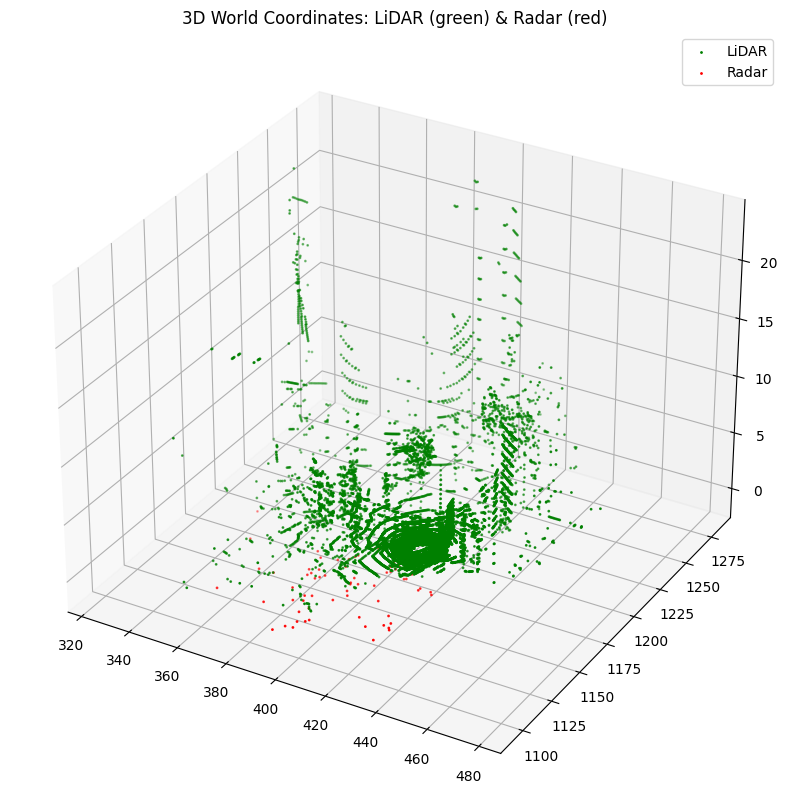

Saved combined point cloud to combined_points.ply


In [ ]:
# Install required packages (if not already installed)
!pip install nuscenes-devkit pyquaternion

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud
from pyquaternion import Quaternion

##############################################
# Helper Functions
##############################################
def get_transform(translation, rotation):
    """
    Create a 4x4 transformation matrix from translation and quaternion rotation.
    """
    T = np.eye(4)
    T[:3, :3] = Quaternion(rotation).rotation_matrix
    T[:3, 3] = translation
    return T

def transform_pointcloud_to_global(pc, sample_data, nusc):
    """
    Transform a point cloud from the sensor frame to the global (world) coordinate system.
    """
    # Get the sensor's calibrated sensor info and ego pose
    cs = nusc.get('calibrated_sensor', sample_data['calibrated_sensor_token'])
    ep = nusc.get('ego_pose', sample_data['ego_pose_token'])

    # Compute transforms: sensor -> ego, then ego -> global
    T_sensor_to_ego = get_transform(cs['translation'], cs['rotation'])
    T_ego_to_global = get_transform(ep['translation'], ep['rotation'])

    # Full transform: sensor -> ego -> global
    T = T_ego_to_global @ T_sensor_to_ego
    pc.transform(T)
    return pc

def save_point_cloud_to_ply(filename, points, colors):
    """
    Save a point cloud (points: 3xN, colors: Nx3) to a .ply file in ASCII format.
    """
    num_points = points.shape[1]
    with open(filename, 'w') as f:
        f.write("ply\n")
        f.write("format ascii 1.0\n")
        f.write("element vertex {}\n".format(num_points))
        f.write("property float x\n")
        f.write("property float y\n")
        f.write("property float z\n")
        f.write("property uchar red\n")
        f.write("property uchar green\n")
        f.write("property uchar blue\n")
        f.write("end_header\n")
        for i in range(num_points):
            x, y, z = points[0, i], points[1, i], points[2, i]
            r, g, b = colors[i]
            f.write("{:.3f} {:.3f} {:.3f} {} {} {}\n".format(x, y, z, int(r), int(g), int(b)))
    print("Saved combined point cloud to", filename)

##############################################
# Main Code: Load, Transform, Visualize, and Save
##############################################
# Set the path to your nuScenes dataset
DATA_ROOT = '/content/nuscenes'
nusc = NuScenes(version='v1.0-mini', dataroot=DATA_ROOT, verbose=True)

# Pick a sample (here we choose the first sample)
sample = nusc.sample[0]

# Retrieve sensor tokens for LiDAR and Radar
lidar_token = sample['data']['LIDAR_TOP']
radar_token = sample['data']['RADAR_FRONT']

# Get sample_data dictionaries and file paths
lidar_data = nusc.get('sample_data', lidar_token)
radar_data = nusc.get('sample_data', radar_token)
lidar_path = nusc.get_sample_data_path(lidar_token)
radar_path = nusc.get_sample_data_path(radar_token)

# Load the LiDAR and Radar point clouds from file
pc_lidar = LidarPointCloud.from_file(lidar_path)
pc_radar = RadarPointCloud.from_file(radar_path)

# Transform the point clouds from sensor frame to global (world) coordinates
pc_lidar_global = transform_pointcloud_to_global(pc_lidar, lidar_data, nusc)
pc_radar_global = transform_pointcloud_to_global(pc_radar, radar_data, nusc)

# Extract the (x, y, z) coordinates for LiDAR and Radar
lidar_points = pc_lidar_global.points[:3, :]  # shape: (3, N)
radar_points = pc_radar_global.points[:3, :]    # shape: (3, M)

##############################################
# 1. Matplotlib 3D Visualization
##############################################
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lidar_points[0, :], lidar_points[1, :], lidar_points[2, :], c='g', s=1, label='LiDAR')
ax.scatter(radar_points[0, :], radar_points[1, :], radar_points[2, :], c='r', s=1, label='Radar')
ax.set_title("3D World Coordinates: LiDAR (green) & Radar (red)")
ax.legend()
plt.show()

##############################################
# 2. Save Combined Point Cloud as .ply
##############################################
# Combine LiDAR and Radar points
combined_points = np.hstack((lidar_points, radar_points))  # shape: (3, N+M)

# Create color arrays: LiDAR as green [0,255,0] and Radar as red [255,0,0]
num_lidar = lidar_points.shape[1]
num_radar = radar_points.shape[1]
colors_lidar = np.tile(np.array([[0, 255, 0]]), (num_lidar, 1))  # green for LiDAR
colors_radar = np.tile(np.array([[255, 0, 0]]), (num_radar, 1))  # red for Radar
combined_colors = np.vstack((colors_lidar, colors_radar))  # shape: (N+M, 3)

# Save the combined point cloud to a .ply file
save_point_cloud_to_ply("combined_points.ply", combined_points, combined_colors)